In [47]:
import pandas as pd
import re

df = pd.read_csv('../datasets/ted_main.csv')

In [48]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data_sample), np.std(data_sample)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

In [49]:
outliers, cleaned = find_remove_outlier(df['num_speaker'])

In [50]:
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print(iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))

<class 'numpy.ndarray'>
1.487576283618532
[-5.0, 11.0, 14.0]
1.487576283618532


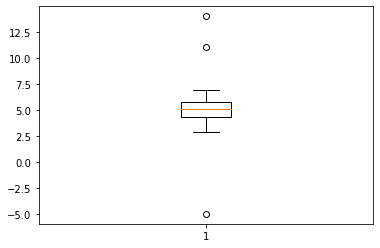

In [51]:
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()

0.8717541573048714
(0.8717541573048717, 1.0384540627938574e-47)


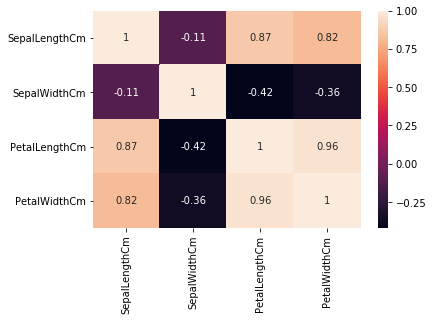

In [52]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('../datasets/Iris.csv')
orig_df = df
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

In [53]:
orig_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [54]:
len(orig_df[(orig_df['Species'] == 'Iris-setosa')])

50

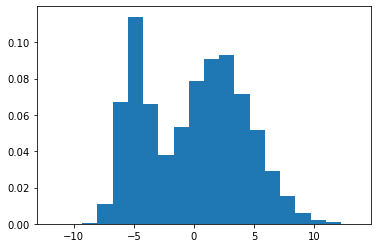

[[ 2.12254238]
 [-4.96277939]]
[[[8.54664102]]

 [[1.13042643]]]
[0.68720132 0.31279868]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

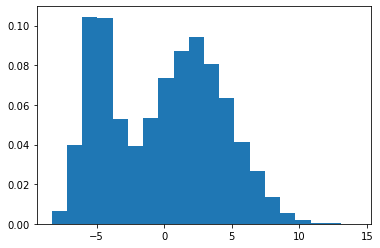

In [58]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

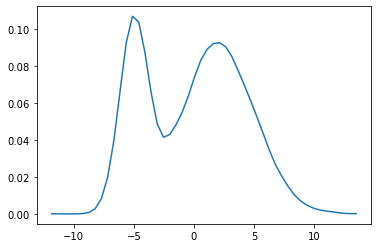

In [59]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))